In [49]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [51]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/dataset dwm.csv')
type(df)
df.head()
df.describe()
df.isnull().sum()
df.isnull().sum().sum()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0

**EXPLORATORY DATA ANALYSIS (EDA)**

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


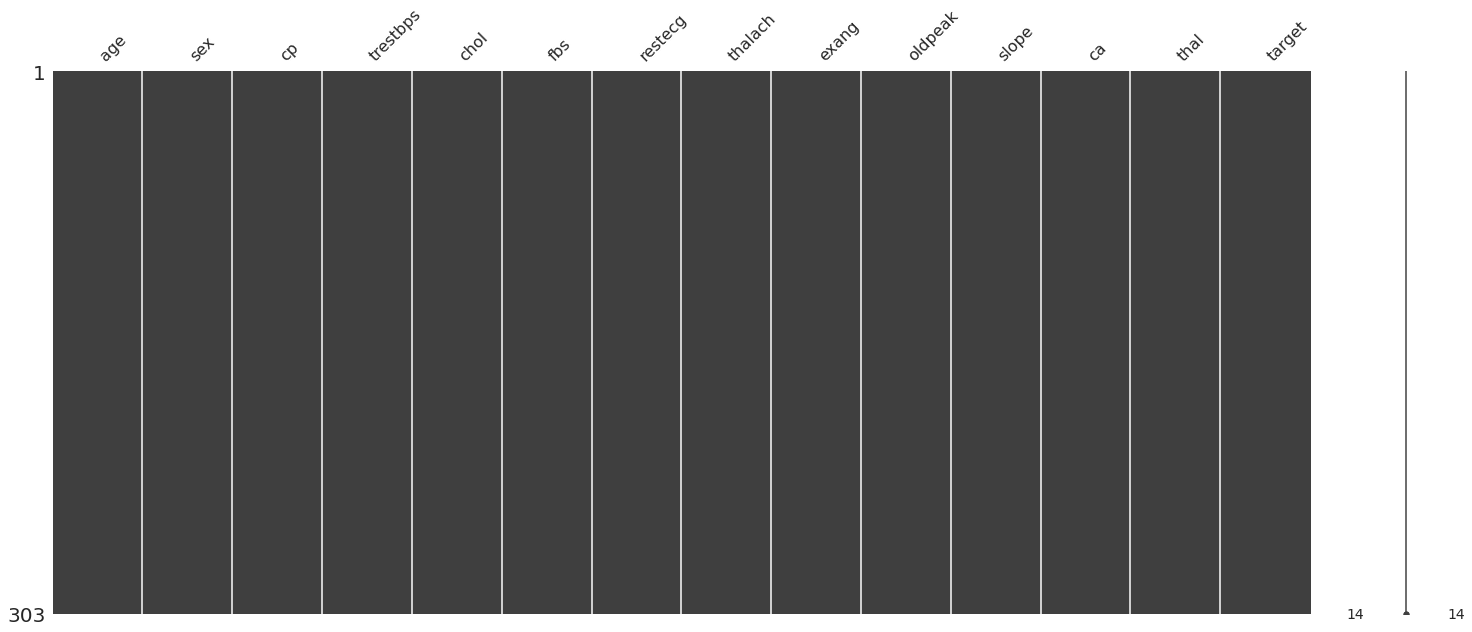

In [53]:
msno.matrix(df)

In [55]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [56]:
print(df.duplicated().value_counts()) 

False    302
True       1
dtype: int64


In [57]:
df = df.drop_duplicates()
print(df.duplicated().value_counts())

False    302
dtype: int64


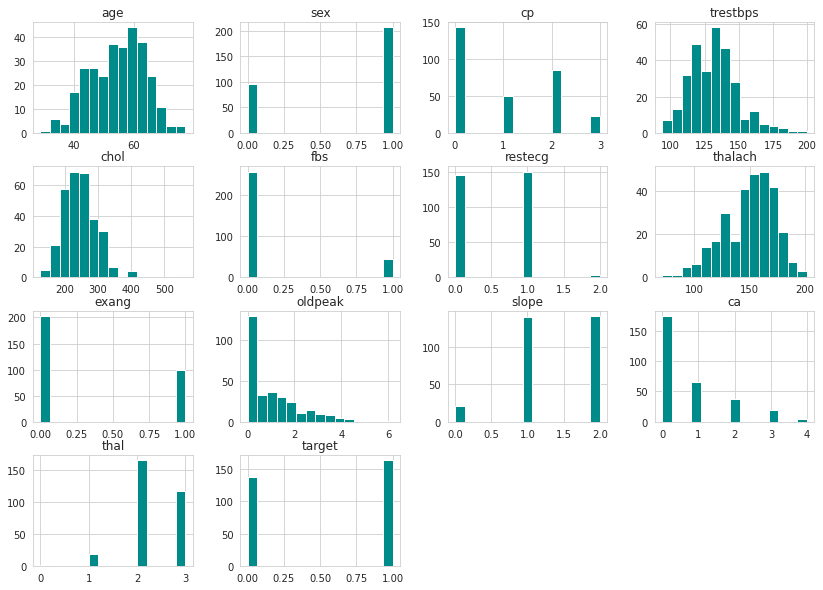

In [58]:
plt.style.use('seaborn-dark-palette')
df.hist(bins=15, figsize=(14,10), color='darkcyan')
plt.show();

In [61]:
categorical_variables = ['age','sex','cp','trestbps','chol','fbs','restecg',
                'thalach','exang','oldpeak','slope','ca','thal','target']


In [62]:
for cat_value in categorical_variables:
    print("{} \n \n".format(cat_value.upper()), df[cat_value].unique(),'\n')
    print(df[cat_value].value_counts())

AGE 
 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
SEX 
 
 [1 0] 

1    206
0     96
Name: sex, dtype: int64
CP 
 
 [3 2 1 0] 

0    143
2     86
1     50
3     23
Name: cp, dtype: int64
TRESTBPS 
 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7


In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


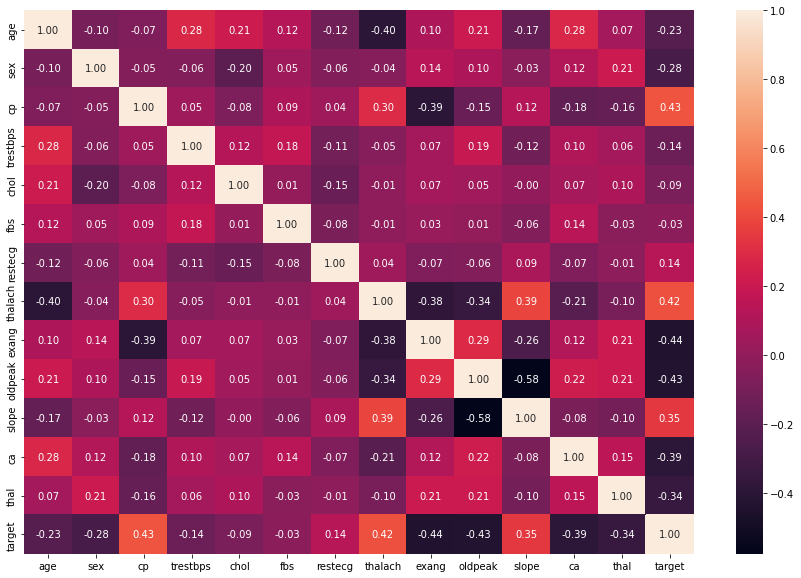

1    165
0    138
Name: target, dtype: int64


In [5]:
# Summary statistics
round(df.describe(),2)
# Dimension
df.shape
# Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.savefig('corr.png')
plt.show()
# Target analysis
print(df.target.value_counts())

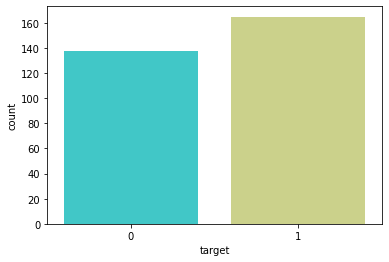

In [6]:
sns.countplot(x="target", data=df, palette="rainbow")
plt.show()

Percentage of patients heart disease absence: 45.54%
Percentage of patients heart presence: 54.46%


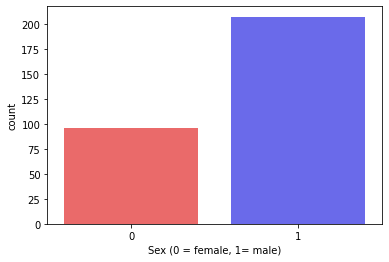

In [7]:
countNoDisease_pct = len(df[df.target == 0]) / (len(df.target)) * 100
countHaveDisease_pct = len(df[df.target == 1]) / (len(df.target)) * 100
print("Percentage of patients heart disease absence: {:.2f}%".format(countNoDisease_pct))
print("Percentage of patients heart presence: {:.2f}%".format(countHaveDisease_pct))
df.thal.value_counts()
# Gender analysis
sns.countplot(x='sex', data=df, palette="seismic_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


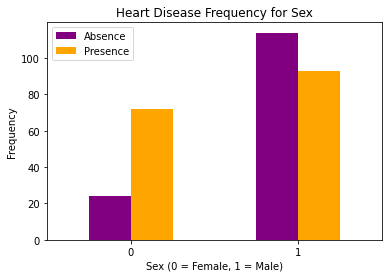

In [8]:
countFemale_pct = len(df[df.sex == 0]) / (len(df.sex)) * 100
countMale_pct = len(df[df.sex == 1]) / (len(df.sex)) * 100
print("Percentage of Female Patients: {:.2f}%".format((countFemale_pct)))
print("Percentage of Male Patients: {:.2f}%".format((countMale_pct)))
pd.crosstab(df.sex,df.target).plot(kind = "bar",color = ['purple','orange'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()

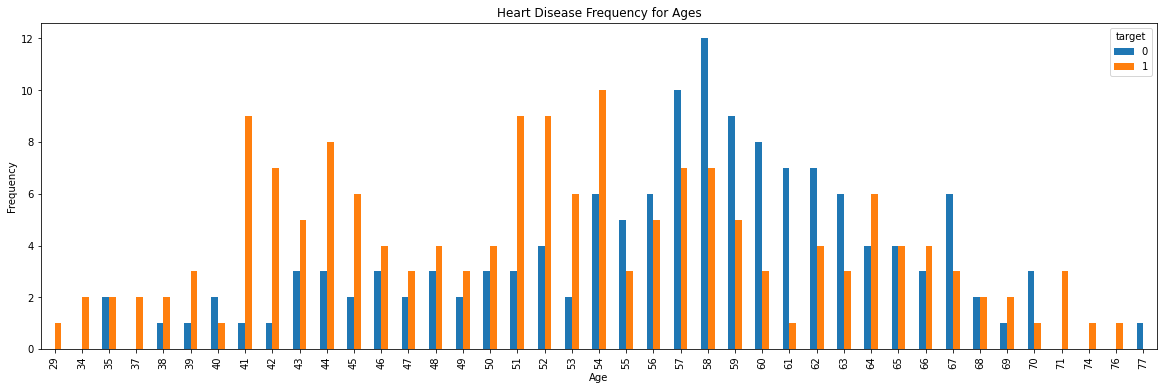

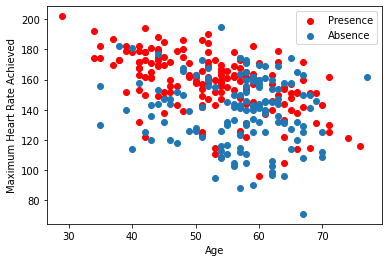

In [9]:
# Mean values for each variable
df.groupby('target').mean()
# Age analysis
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Maximum Heart Rate Achieved vs Age
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], color="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Presence", "Absence"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

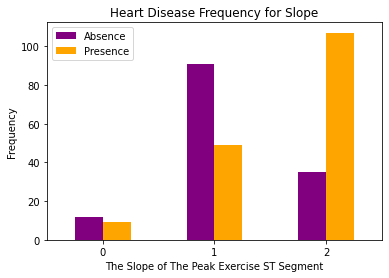

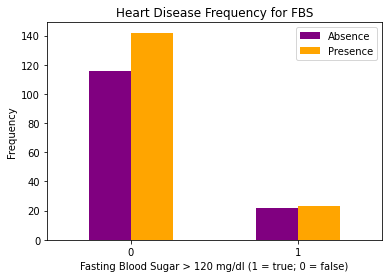

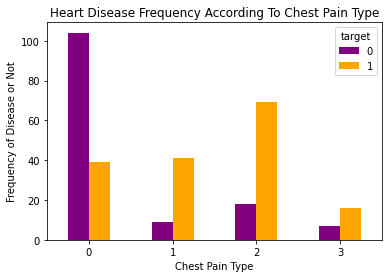

In [10]:
# The Slope of The Peak Exercise ST Segment
pd.crosstab(df.slope,df.target).plot(kind="bar", color = ['purple','orange'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation = 0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()
# Fasting blood sugar analysis
pd.crosstab(df.fbs,df.target).plot(kind="bar", color = ['purple','orange'])
plt.title('Heart Disease Frequency for FBS')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Frequency')
plt.show()
# Chest pain type analysis
pd.crosstab(df.cp,df.target).plot(kind="bar", color = ['purple','orange'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

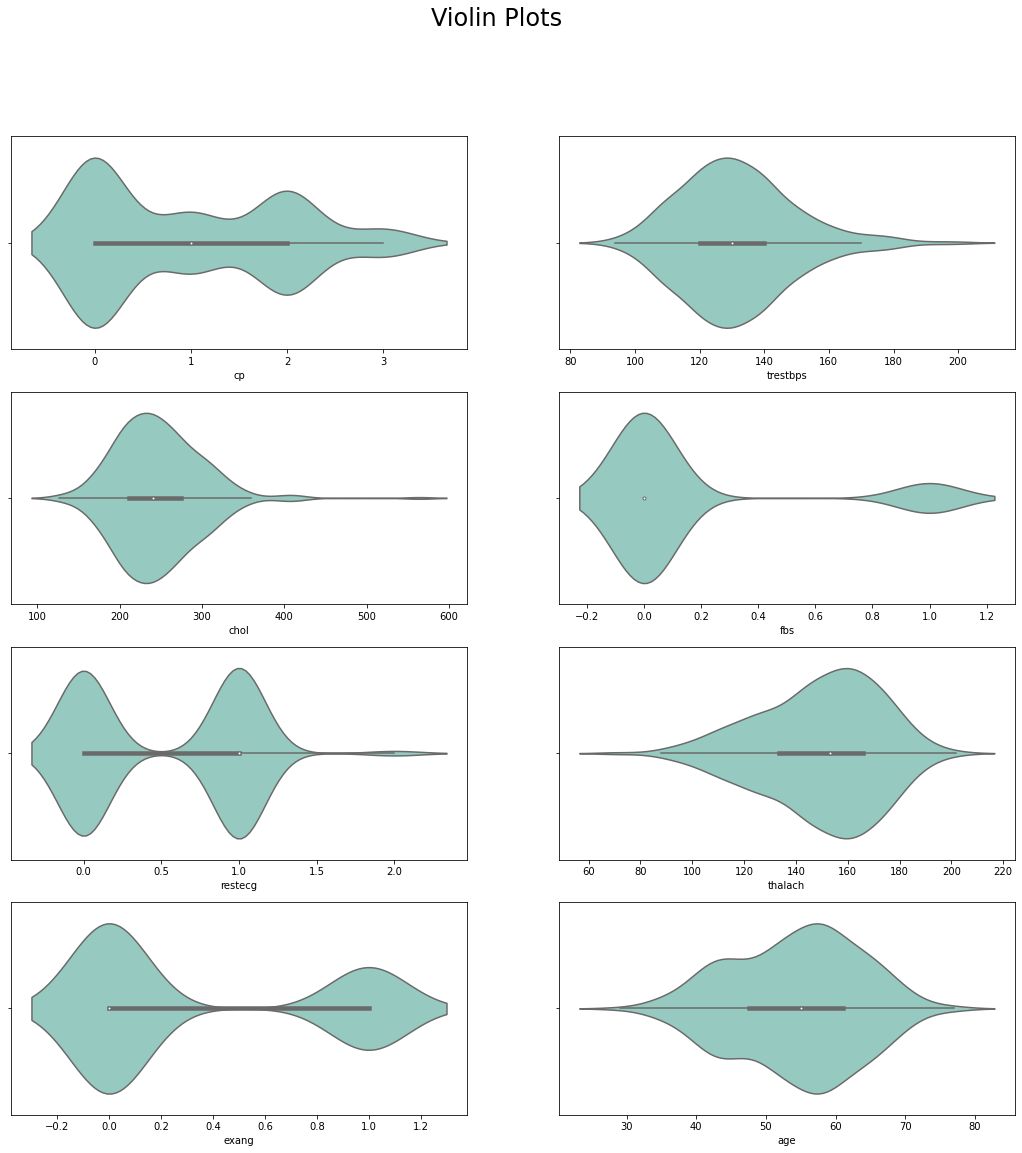

In [11]:
#Violin Plots
fig, index = plt.subplots(nrows = 4, ncols = 2, figsize = (18,18))
plt.suptitle('Violin Plots',fontsize = 24)
sns.violinplot(x = "cp", data = df,ax = index[0,0],palette = 'Set3')
sns.violinplot(x = "trestbps", data = df,ax = index[0,1],palette = 'Set3')
sns.violinplot (x  = 'chol', data = df, ax = index[1,0], palette = 'Set3')
sns.violinplot(x = 'fbs', data = df, ax = index[1,1],palette = 'Set3')
sns.violinplot(x = 'restecg', data = df, ax = index[2,0], palette = 'Set3')
sns.violinplot(x = 'thalach', data = df, ax = index[2,1],palette = 'Set3')
sns.violinplot(x = 'exang', data = df, ax = index[3,0],palette = 'Set3')
sns.violinplot(x = 'age', data = df, ax = index[3,1],palette = 'Set3')
plt.show()

***CREATING DUMMY VARIABLES***

In [12]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['restecg'], prefix = "restecg")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['ca'], prefix = "ca")
e = pd.get_dummies(df['thal'], prefix = "thal")
# f = pd.get_dummies(df['sex'], prefix = "sex")
# g = pd.get_dummies(df['fbs'], prefix = "fbs")
frames = [df, a, b, c, d, e]
df_dummy = pd.concat(frames, axis = 1)
df_dummy.head()
df_dummy = df_dummy.drop(columns = ['cp', 'restecg', 'thal', 'ca', 'slope'])
df_dummy.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0
5,57,1,140,192,0,148,0,0.4,1,1,...,0,1,0,0,0,0,0,1,0,0
6,56,0,140,294,0,153,0,1.3,1,0,...,0,1,0,0,0,0,0,0,1,0
7,44,1,120,263,0,173,0,0.0,1,0,...,1,1,0,0,0,0,0,0,0,1
8,52,1,172,199,1,162,0,0.5,1,0,...,1,1,0,0,0,0,0,0,0,1
9,57,1,150,168,0,174,0,1.6,1,0,...,1,1,0,0,0,0,0,0,1,0


***NORMALIZATION***

In [13]:
# Define function
def normalize(x):
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x)).values
    return x_norm
df_norm = normalize(df_dummy)
df_norm.head(6)
df_norm.columns
y = df_norm.target.values
x = df_norm.drop(['target'], axis = 1)

***SPLITTING DATA***

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (242, 27)
x_test: (61, 27)
y_train: (242,)
y_test: (61,)


**LOGISTIC REGRESSION**

iteration: 100
cost: 0.3396048068843611


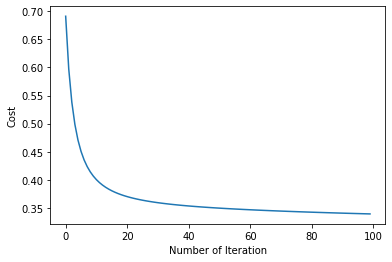

Manuel Test Accuracy: 91.80%
[[28  4]
 [ 1 28]]
Test Accuracy 91.80%
[0.88 0.8  0.75 0.62 0.88 0.79 0.88 0.88 0.92 0.83]
10-fold CV Test Accuracy 82.22%


In [15]:
def initialize(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_hat = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_hat-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_hat-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_hat = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_hat.shape[1]):
        if y_hat[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))
    return y_prediction[0]
y_pred = logistic_regression(x_train.T, y_train.T, x_test.T, y_test.T, 1, 100)
cm_lr=confusion_matrix(y_test.T,y_pred.T)
print(cm_lr)
'''plt.figure(figsize=(15,10))
sns.heatmap(cm_lr,annot=True)
plt.show()'''
# Sklearn Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrscore = lr.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(lrscore))
# 10-fold CV
parameters=[{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[2]
    },]

lrcv = GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
lrcv.fit(x_train,y_train)
predictions = [(lrcv.predict(x_train),y_train,'Train'),
               (lrcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=LogisticRegression(), X = x_train, y = y_train, cv = 10)

lrscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(lrscore_cv))

**K-NEAREST NEIGHBOR ALGORITHM**

 1NN Score: 88.52%
 3NN Score: 90.16%
 5NN Score: 91.80%
 7NN Score: 91.80%
 9NN Score: 91.80%
11NN Score: 93.44%
13NN Score: 91.80%
15NN Score: 91.80%
17NN Score: 91.80%
19NN Score: 91.80%
21NN Score: 90.16%
23NN Score: 90.16%
25NN Score: 90.16%
27NN Score: 90.16%
29NN Score: 91.80%
31NN Score: 91.80%
KNN Test Accuracy with k = 11: 93.44%


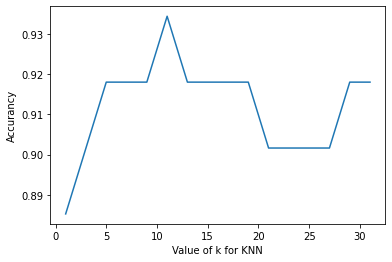

[[29  3]
 [ 1 28]]
[0.8  0.76 0.75 0.79 0.92 0.83 0.88 0.79 0.79 0.88]
10-fold CV Test Accuracy 81.85%


In [16]:
n = 33
i = 0
k_scores=[]
for k in range(1,n,2):
    knn = KNeighborsClassifier(n_neighbors = k)  # n_neighbors means k
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    k_scores.append(knn.score(x_test, y_test))
    print("{:>2}NN Score: {:.2f}%".format(k, k_scores[i]*100))
    i += 1
knn = KNeighborsClassifier(n_neighbors = 11) 
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
knnscore = knn.score(x_test, y_test)*100
print("KNN Test Accuracy with k = 11: {:.2f}%".format(knnscore))
plt.figure()#figsize=(15,10))
plt.plot(range(1,n,2),k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Accurancy")
#plt.savefig('knn.png')
plt.show()
y_pred = knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_pred)
print(cm_knn)
'''plt.figure()
sns.heatmap(cm_knn,annot=True)
plt.show()'''
# 10-fold CV
parameters=[{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6],
    },]

knncv = GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
knncv.fit(x_train,y_train)
predictions = [(knncv.predict(x_train),y_train,'Train'),
               (knncv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=KNeighborsClassifier(), X = x_train, y = y_train, cv = 10)

knnscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(knnscore_cv))

**NAIVE BAYES ALGORITHM**

In [31]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nbscore = nb.score(x_test,y_test)*100
print("Accuracy of Naive Bayes: {:.2f}%".format(nbscore))
y_pred = nb.predict(x_test)
cm_nb=confusion_matrix(y_test,y_pred)
print(cm_nb)
'''plt.figure()
sns.heatmap(cm_nb,annot=True)
plt.show()'''
# 10-fold CV
parameters=[{
    },]

nbcv = GridSearchCV(GaussianNB(),parameters,scoring='accuracy')
nbcv.fit(x_train,y_train)
predictions = [(nbcv.predict(x_train),y_train,'Train'),
               (nbcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=GaussianNB(), X = x_train, y = y_train, cv = 10)

nbscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(nbscore_cv))

Accuracy of Naive Bayes: 78.69%
[[31  1]
 [12 17]]
[0.44 0.68 0.67 0.67 0.67 0.67 0.71 0.58 0.67 0.79]
10-fold CV Test Accuracy 65.37%


**DECISION TREE**

In [ ]:
dtc = DecisionTreeClassifier(random_state = 2)
dtc.fit(x_train, y_train)
dtscore = dtc.score(x_test, y_test)*100
print("Decision Tree Test Accuracy {:.2f}%".format(dtscore))
y_pred = dtc.predict(x_test)
cm_dt=confusion_matrix(y_test,y_pred)
print(cm_dt)
'''plt.figure()
sns.heatmap(cm_dt,annot=True)
plt.show()'''
# 10-fold CV
parameters = [
{
    'random_state': [2],
    },
]

dtcv = GridSearchCV(DecisionTreeClassifier(),parameters,scoring='accuracy')
dtcv.fit(x_train,y_train)
predictions = [(dtcv.predict(x_train),y_train,'Train'),
               (dtcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=DecisionTreeClassifier(random_state = 2), X = x_train, y = y_train, cv = 10)

dtscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(dtscore_cv))

**SUPPORT VECTOR MACHINE(SVM)**

In [18]:
svm = SVC(random_state = 2)
svm.fit(x_train, y_train)
svmscore = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svmscore))
y_pred = svm.predict(x_test)
cm_svm=confusion_matrix(y_test,y_pred)
print(cm_svm)
'''plt.figure()
sns.heatmap(cm,annot=True)
plt.show()'''
# 10-fold CV

parameters = [
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [2],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]


svmcv = GridSearchCV(SVC(),parameters,scoring='accuracy')
svmcv.fit(x_train,y_train)
predictions = [(svmcv.predict(x_train),y_train,'Train'),
               (svmcv.predict(x_test),y_test,'Test'),]
cv_score = cross_val_score(estimator=SVC(), X = x_train, y = y_train, cv = 10)

svmscore_cv = cv_score.mean() * 100

print(np.round(cv_score,2))
print("10-fold CV Test Accuracy {:.2f}%".format(svmscore_cv))

Test Accuracy of SVM Algorithm: 88.52%
[[26  6]
 [ 1 28]]
[0.84 0.84 0.75 0.79 0.88 0.83 0.83 0.88 0.83 0.88]
10-fold CV Test Accuracy 83.47%


**ANALYSIS PERFORMANCE**

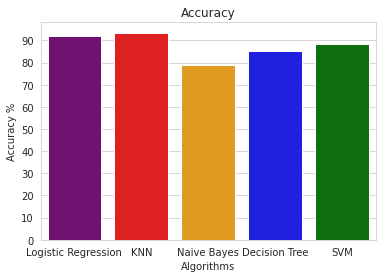

[91.8  93.44 78.69 85.25 88.52]


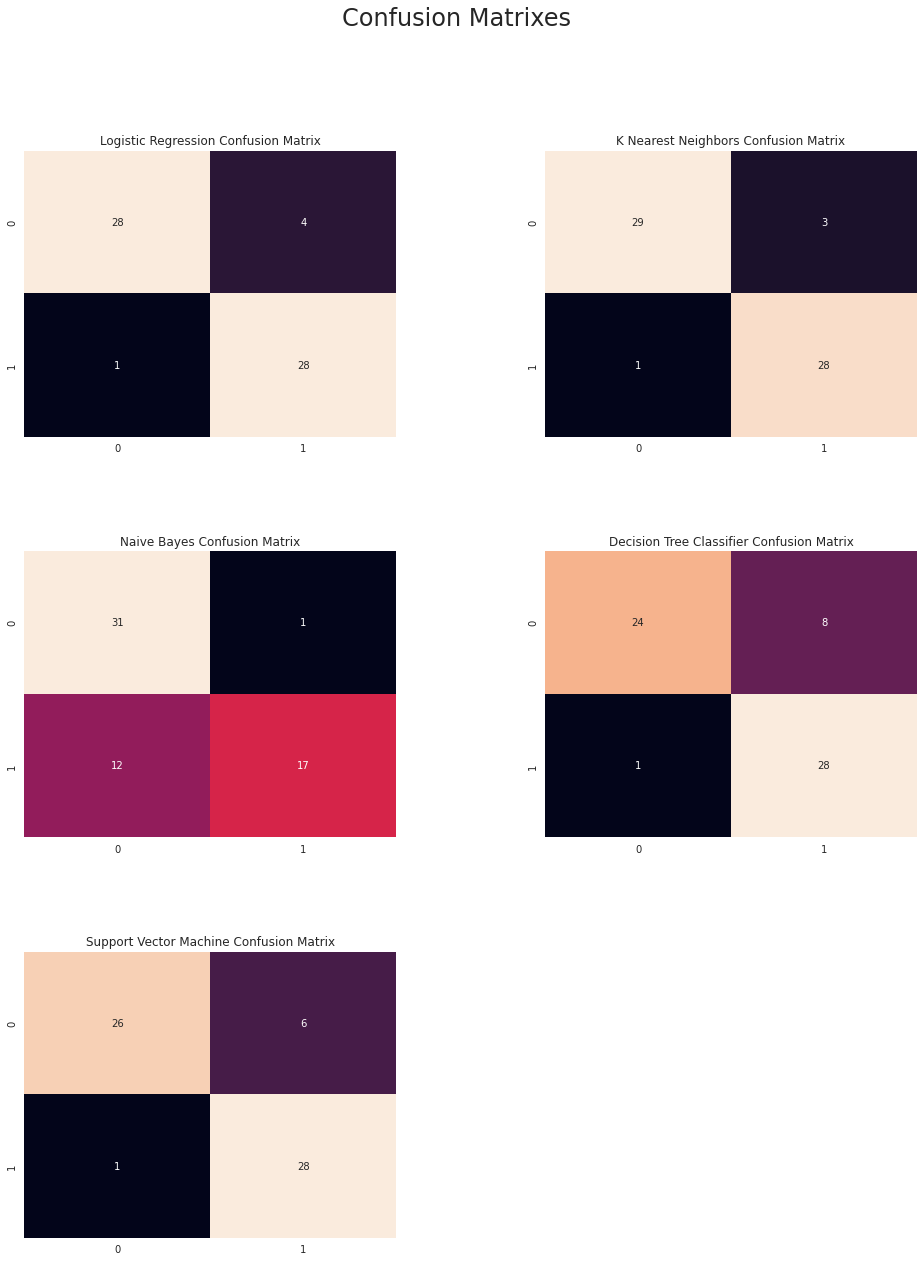

In [32]:
methods = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "SVM"]
accuracy = [lrscore, knnscore, nbscore, dtscore, svmscore]
colors = ["purple", "red", "orange", "blue","green"]

sns.set_style("whitegrid")
plt.figure()#figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("Accuracy")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()
print(np.round(accuracy,2))
methods = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "SVM"]
accuracy = [lrscore_cv, knnscore_cv, nbscore_cv, dtscore_cv, svmscore_cv]
colors = ["purple", "red", "orange", "blue","green"]

# Confusion Matrix

plt.figure(figsize=(16,20))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,fmt="d",cbar=False)

plt.subplot(3,2,5)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,fmt="d",cbar=False)

plt.show()